In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataprob
import copy
import linkage
import time
from scipy.stats import qmc
import warnings
import matplotlib.pyplot as mpl
from IPython.display import clear_output
import os
import logging

#### Load experimental data

In [2]:
#### Load Experimental Data

## EDTA --> Buffer

cell_vol = 201.3
sd = 0.1

## EDTA --> Buffer

blank1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa2.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa3.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank2.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## Ca --> Buffer

blank3 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank3.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank4 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer2.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank4.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## EDTA --> Ca

edtaca1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3mMEDTAto500uMCa.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca1.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3p5mMEDTAto500uMCaCl2HHR.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca2.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca3 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240915\3p5mMEDTAto500uMCaCl2lowres.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca3.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca4 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240913\3p5mMEDTAto500uMCaLOWRES.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca4.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca5 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca5.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca6 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca6.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca7 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_3.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca7.define_itc_observable(obs_column="heat",
                            obs_std=sd)




#### Create a linkage model

In [9]:
expt_list = [blank1, blank2, blank3, blank4, edtaca1, edtaca5, edtaca6, edtaca7] 
#expt_list = [blank1, blank2] 
#expt_list = [blank1, edtaca1] 

gm = linkage.GlobalModel(model_name="CaEDTA",
                         expt_list=expt_list)

f = dataprob.setup(gm.model_normalized,
                   vector_first_arg=True,
                   method="ml",
                   fit_parameters=gm.parameter_names)

f.param_df


DEBUG _build_point_map:

Processing experiment 0:
Macro species expected: ['CT' 'ET']
Columns in expt_concs: Index(['injection', 'volume', 'ET', 'CT'], dtype='object')

First few rows of expt_concs:
   injection  volume        ET   CT
0       0.00  201.30  0.000000  0.0
1       2.35  203.65  0.000046  0.0
2       1.50  205.15  0.000075  0.0
3       1.50  206.65  0.000104  0.0
4       1.50  208.15  0.000132  0.0

Macro array creation check:
Column 0 (CT): [0. 0. 0. 0. 0.]
Column 1 (ET): [0.00000000e+00 4.61576234e-05 7.50670241e-05 1.03556738e-04
 1.31635840e-04]

Macro array shape: (26, 2)
First few rows of macro array:
[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.61576234e-05]
 [0.00000000e+00 7.50670241e-05]
 [0.00000000e+00 1.03556738e-04]
 [0.00000000e+00 1.31635840e-04]]

Syringe concentrations: [0.    0.004]

Processing experiment 1:
Macro species expected: ['CT' 'ET']
Columns in expt_concs: Index(['injection', 'volume', 'ET', 'CT'], dtype='object')

First few rows of exp

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,0.0,False,-inf,inf,NaN,NaN
dH_E,dH_E,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,0.0,False,-inf,inf,NaN,NaN


#### Do fit

In [10]:
# Parameters

f.param_df.loc["KE","guess"] = 13
f.param_df.loc["KE","upper_bound"] = 20
f.param_df.loc["KE","lower_bound"] = 11
f.param_df.loc["KE","fixed"] = False

f.param_df.loc["dH_E","guess"] = -11970
f.param_df.loc["dH_E","upper_bound"] = -10000
f.param_df.loc["dH_E","lower_bound"] = -14000
f.param_df.loc["dH_E","fixed"] = False

# Get all parameter names containing 'nuisance_expt' and 'ET_fudge'
fudge_params = [col for col in f.param_df.index if 'nuisance_expt' in col]

# Link all fudge parameters (except 0) to the first one
for param in fudge_params:
        f.param_df.loc[param, 'guess'] = 1.1
        f.param_df.loc[param, 'fixed'] = True
        f.param_df.loc[param, 'lower_bound'] = -2
        f.param_df.loc[param, 'upper_bound'] = 2


In [11]:
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,13.0,False,11.0,20.0,NaN,NaN
dH_E,dH_E,-11970.0,False,-14000.0,-10000.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN


In [12]:
# Run fit

f.fit(
      y_obs=gm.y_obs_normalized,
      y_std=gm.y_std_normalized,
      #max_convergence_cycles=2,
      #use_ml_guess=False,
      #num_steps=100,
      #num_walkers=800, # number of markov chains to use in the analysis, default=100       
      method='trf',  # Algorithm to use for optimization
      jac='3-point',  # Method for computing the Jacobian matrix
      ftol=1e-12,  # Tolerance for termination by the change of the cost function
      xtol=1e-9,  # Tolerance for termination by the change of the independent variables
      #gtol=1e-8,  # Tolerance for termination by the norm of the gradient
      x_scale='jac',  # Scaling of the variables
      #loss='arctan',  # Loss function for dealing with outliers
      #f_scale=0.01  # Soft margin between inlier and outlier residuals
      #max_nfev=None,  # Maximum number of function evaluations
      #verbose=2  # Level of algorithm's verbosity
     )
f.fit_df


Fitting Information:
Number of parameters to fit: 4
Initial guesses: [    13. -11970.      0.      0.]
Bounds: 
Lower: [ 1.1e+01 -1.4e+04     -inf     -inf]
Upper: [    20. -10000.     inf     inf]

Fit Complete:
Success: True
Status: 2
Message: `ftol` termination condition is satisfied.
Number of function evaluations: 10
Final cost: 53269.96830498034
Optimality: 0.0011297063213140056

Jacobian Analysis:
Jacobian shape: (264, 4)
Jacobian condition number: 852.5102265127855
Jacobian value range: [-16.252003132046774, 16.3774268245942]
Singular values: [75.50791042  0.58687116  0.24456666  0.08857127]
Singular value ratios: [128.66181815   2.39963682   2.76124152]
Covariance matrix condition number: 726773.686308896


,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.141227,0.009611,16.122302,16.160152,13.0,False,11.0,20.0,NaN,NaN
dH_E,dH_E,-10985.522628,2.708111,-10990.855347,-10980.189909,-11970.0,False,-14000.0,-10000.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-402.169281,7.901735,-417.729105,-386.609457,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,30.194254,1.943135,26.367898,34.020609,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN


In [7]:
f.fit_quality

,description,is_good,value,message
name,,,,
success,fit success status,True,True,
num_obs,number of observations,True,264,
num_param,number of fit parameters,True,4,There are 260 more observations than fit param...
lnL,log likelihood,True,-52094.908966,
chi2,chi^2 goodness-of-fit,False,0.0,A p-value of 0.000e+00 for the a goodness-of-f...
reduced_chi2,reduced chi^2,False,411.351107,A reduced chi^2 value of 411.351 may mean the ...
mean0_resid,t-test for residual mean != 0,True,0.054142,A p-value of 5.414e-02 for the one-sample t-te...
durbin-watson,Durbin-Watson test for correlated residuals,False,0.387445,A Durbin-Watson test-statistic of 0.387 is is ...
ljung-box,Ljung-Box test for correlated residuals,False,0.000001,A p-value of 7.625e-07 for the Ljung-Box test ...


#### Plot results

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.141227,0.009611,16.122302,16.160152,13.0,False,11.0,20.0,NaN,NaN
dH_E,dH_E,-10985.522628,2.708111,-10990.855347,-10980.189909,-11970.0,False,-14000.0,-10000.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-402.169281,7.901735,-417.729105,-386.609457,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,30.194254,1.943135,26.367898,34.020609,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN


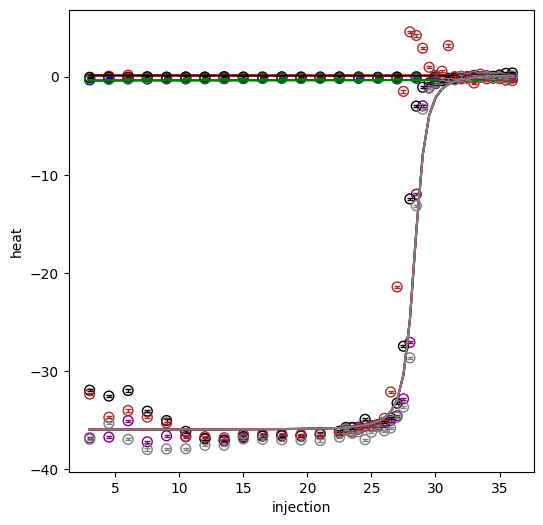

In [13]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
err_style = {"lw":0,
             "elinewidth":1,
             "capsize":2}


color_order = ["red","black", "blue", "green", "purple", "black", "brown", "gray", "orange"]


fig, ax = plt.subplots(1,figsize=(6,6))
out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))
for i in np.unique(out_df.expt_id):
    
    style["edgecolor"] = color_order[i]
    err_style["color"] = color_order[i]
    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]
    
    x_values = np.cumsum(this_df["injection"])[1:]  # Skip first point
    y_values = np.array(this_df["y_obs"])[1:]       # Skip first point
    y_err = np.array(this_df["y_std"])/np.mean(this_df["injection"])
    y_err = y_err[1:]                               # Skip first point
    this_y_calc = y_calc[mask]/this_df["injection"]
    this_y_calc = this_y_calc[1:]                   # Skip first point 
    y_values = y_values/this_df["injection"][1:]    # Skip first point
    
    ax.scatter(x_values,y_values,**style)
    ax.errorbar(x=x_values,
                y=y_values,
                yerr=y_err,
                **err_style)
    ax.plot(x_values,this_y_calc,'-',color=color_order[i])
    
plt.xlabel("injection")
plt.ylabel("heat")
f.fit_df

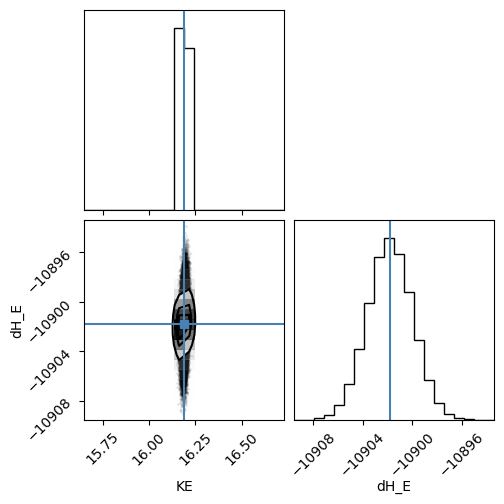

In [8]:
fig = dataprob.plot_corner(f)

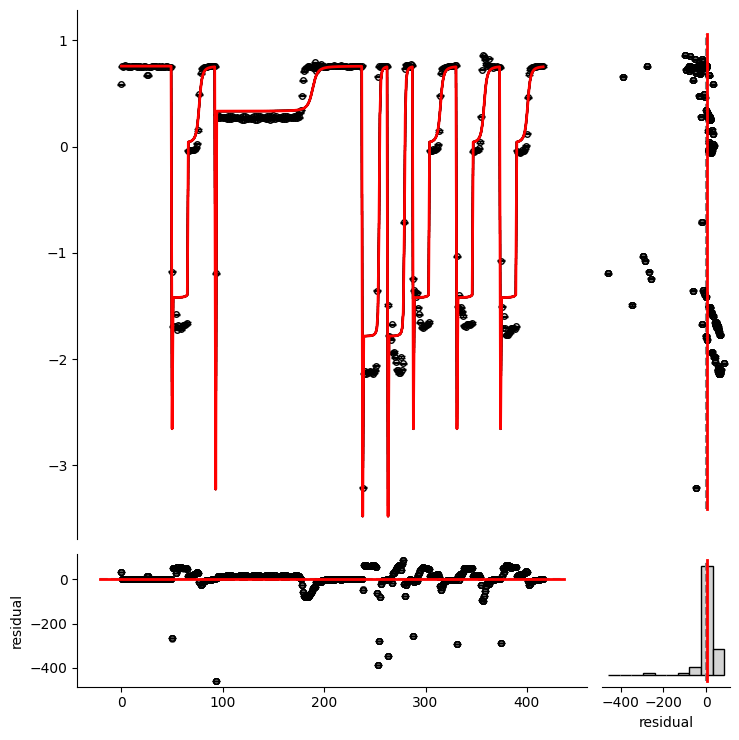

In [31]:
fig = dataprob.plot_summary(f)
